Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr


ModuleNotFoundError: No module named 'pandas'

Reading in Data

In [4]:
data = pd.read_csv("Raw Data/ObesityDataSet_raw_and_data_sinthetic.csv")

In [5]:
print("Dataset size: ", np.shape(data)) # this matches the description on the website - the website says there is no missing data, but we will check regardless


display(data.columns) # need to figure out what the columns mean


Dataset size:  (2111, 17)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Description of Features:

- FAVC	Feature	Binary		Do you eat high caloric food frequently?		no
- FCVC	Feature	Integer		Do you usually eat vegetables in your meals?		no
- NCP	Feature	Continuous		How many main meals do you have daily?		no
- CAEC	Feature	Categorical		Do you eat any food between meals?		no
- SMOKE	Feature	Binary		Do you smoke?		no
- CH2O	Feature	Continuous		How much water do you drink daily?		no
- SCC	Feature	Binary		Do you monitor the calories you eat daily?		no
- FAF	Feature	Continuous		How often do you have physical activity?		no
- TUE	Feature	Integer		How much time do you use technological devices such as cell phone, videogames, television, computer and others?		no
- CALC	Feature	Categorical		How often do you drink alcohol?		no
- MTRANS	Feature	Categorical		Which transportation do you usually use?		no
- NObeyesdad	Target	Categorical		Obesity level	

In [6]:
display(data.head())

print("Veggie Diet Min: ", data['FCVC'].min(), "Max: ", data['FCVC'].max()) # veggie diet - categorical from 1 to 3 (never, sometimes, always)
print("Snacking: ",data['CAEC'].unique()) # snacking - categorical ['Sometimes' 'Frequently' 'Always' 'no']
print("Water Amount Min: ",data['CH2O'].min(), "Max: ", data['CH2O'].max()) # amount of water from 1 to 3 (Less than a liter, between 1 and 2 liters, more than 2l) - bit weird, just going toleave this as continuous even though the website says its categorical...
print("Time Spent Tech Min: ", data['TUE'].min(), "Max: ", data['TUE'].max()) # time spent on technology from 0 to 2 (0-2 hours, 3-5 hours, more than 5 hours) - also going to leave as continuous
print("Main Meals Min: ", data['NCP'].min(),  "Max: ", data['NCP'].max()) # categorical 1 - 4, but the values are not categortical, so going to just leave it as continuous
print("Exercise Min: ", data['FAF'].min(), "Max: ", data['FAF'].max()) # 0 to 3 (0, 1 or 2 days per week, 2 or 4 days per week, 4 or 5 days per week) - also says its categorical but it's a continuous value? 


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Veggie Diet Min:  1.0 Max:  3.0
Snacking:  ['Sometimes' 'Frequently' 'Always' 'no']
Water Amount Min:  1.0 Max:  3.0
Time Spent Tech Min:  0.0 Max:  2.0
Main Meals Min:  1.0 Max:  4.0
Exercise Min:  0.0 Max:  3.0


In [7]:
# renaming columns so they are more intuitive 

colnames = ['gender','age','height','weight','family_history', 'high_cal_diet','freq_veggie','amt_daily_meals','freq_snacking','smoking', 'amt_water', 'cal_monitoring','exercise_per_week','time_technology','freq_alcohol','transport','obesity_group']
len(colnames)

obesity_data_df = pd.DataFrame(data)
obesity_data_df.columns = colnames

obesity_data_df.head()


,gender,age,height,weight,family_history,high_cal_diet,freq_veggie,amt_daily_meals,freq_snacking,smoking,amt_water,cal_monitoring,exercise_per_week,time_technology,freq_alcohol,transport,obesity_group
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
# cleaning strings to make it all lowercase

for col in obesity_data_df.select_dtypes(include='object').columns:
    obesity_data_df[col] = obesity_data_df[col].str.lower()
    obesity_data_df[col] = obesity_data_df[col].str.strip()
    

obesity_data_df.head()

,gender,age,height,weight,family_history,high_cal_diet,freq_veggie,amt_daily_meals,freq_snacking,smoking,amt_water,cal_monitoring,exercise_per_week,time_technology,freq_alcohol,transport,obesity_group
0,female,21.0,1.62,64.0,yes,no,2.0,3.0,sometimes,no,2.0,no,0.0,1.0,no,public_transportation,normal_weight
1,female,21.0,1.52,56.0,yes,no,3.0,3.0,sometimes,yes,3.0,yes,3.0,0.0,sometimes,public_transportation,normal_weight
2,male,23.0,1.80,77.0,yes,no,2.0,3.0,sometimes,no,2.0,no,2.0,1.0,frequently,public_transportation,normal_weight
3,male,27.0,1.80,87.0,no,no,3.0,3.0,sometimes,no,2.0,no,2.0,0.0,frequently,walking,overweight_level_i
4,male,22.0,1.78,89.8,no,no,2.0,1.0,sometimes,no,2.0,no,0.0,0.0,sometimes,public_transportation,overweight_level_ii


In [ ]:
# now also assigning binary variables correctly/coding correctly
# assumes 1 is yes and 0 is no
binary_cols = ['family_history', 'high_cal_diet', 'smoking', 'cal_monitoring']

for col in binary_cols:
    obesity_data_df[col] = obesity_data_df[col].map({'yes': 1, 'no': 0})

obesity_data_df.head()

        

,gender,age,height,weight,family_history,high_cal_diet,freq_veggie,amt_daily_meals,freq_snacking,smoking,amt_water,cal_monitoring,exercise_per_week,time_technology,freq_alcohol,transport,obesity_group
0,female,21.0,1.62,64.0,1,0,2.0,3.0,sometimes,0,2.0,0,0.0,1.0,no,public_transportation,normal_weight
1,female,21.0,1.52,56.0,1,0,3.0,3.0,sometimes,1,3.0,1,3.0,0.0,sometimes,public_transportation,normal_weight
2,male,23.0,1.80,77.0,1,0,2.0,3.0,sometimes,0,2.0,0,2.0,1.0,frequently,public_transportation,normal_weight
3,male,27.0,1.80,87.0,0,0,3.0,3.0,sometimes,0,2.0,0,2.0,0.0,frequently,walking,overweight_level_i
4,male,22.0,1.78,89.8,0,0,2.0,1.0,sometimes,0,2.0,0,0.0,0.0,sometimes,public_transportation,overweight_level_ii


In [10]:
# coding categorical variables with numbers
# snacking
obesity_data_df.freq_snacking.unique()
obesity_data_df.freq_snacking = obesity_data_df.freq_snacking.map({'no': 0, 
                                                                   'sometimes': 1,
                                                                   'frequently': 2,
                                                                   'always': 3})

# alcohol
obesity_data_df.freq_alcohol.unique()
obesity_data_df.freq_alcohol = obesity_data_df.freq_alcohol.map({'no': 0, 
                                                                   'sometimes': 1,
                                                                   'frequently': 2,
                                                                   'always': 3})


In [11]:
print("Num of duplicates: ", len(obesity_data_df[obesity_data_df.duplicated()])) # according to this, there are 24 duplicated rows

duplicates = obesity_data_df[obesity_data_df.duplicated()]
display(duplicates)

Num of duplicates:  24


,gender,age,height,weight,family_history,high_cal_diet,freq_veggie,amt_daily_meals,freq_snacking,smoking,amt_water,cal_monitoring,exercise_per_week,time_technology,freq_alcohol,transport,obesity_group
98,female,21.0,1.52,42.0,0,0,3.0,1.0,2,0,1.0,0,0.0,0.0,1,public_transportation,insufficient_weight
106,female,25.0,1.57,55.0,0,1,2.0,1.0,1,0,2.0,0,2.0,0.0,1,public_transportation,normal_weight
174,male,21.0,1.62,70.0,0,1,2.0,1.0,0,0,3.0,0,1.0,0.0,1,public_transportation,overweight_level_i
179,male,21.0,1.62,70.0,0,1,2.0,1.0,0,0,3.0,0,1.0,0.0,1,public_transportation,overweight_level_i
184,male,21.0,1.62,70.0,0,1,2.0,1.0,0,0,3.0,0,1.0,0.0,1,public_transportation,overweight_level_i
209,female,22.0,1.69,65.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,1,public_transportation,normal_weight
309,female,16.0,1.66,58.0,0,0,2.0,1.0,1,0,1.0,0,0.0,1.0,0,walking,normal_weight
460,female,18.0,1.62,55.0,1,1,2.0,3.0,2,0,1.0,0,1.0,1.0,0,public_transportation,normal_weight
467,male,22.0,1.74,75.0,1,1,3.0,3.0,2,0,1.0,0,1.0,0.0,0,automobile,normal_weight
496,male,18.0,1.72,53.0,1,1,2.0,3.0,1,0,2.0,0,0.0,2.0,1,public_transportation,insufficient_weight


In [12]:
# dropping duplicates

obesity_data_clean = obesity_data_df.drop_duplicates()
print(len(obesity_data_clean))

len(obesity_data_clean) == len(obesity_data_df) - len(duplicates) # should return true to make sure that the duplicates were dropped and sample size is correct
obesity_data_clean.head()


2087


,gender,age,height,weight,family_history,high_cal_diet,freq_veggie,amt_daily_meals,freq_snacking,smoking,amt_water,cal_monitoring,exercise_per_week,time_technology,freq_alcohol,transport,obesity_group
0,female,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,public_transportation,normal_weight
1,female,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,public_transportation,normal_weight
2,male,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,public_transportation,normal_weight
3,male,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,walking,overweight_level_i
4,male,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,public_transportation,overweight_level_ii


In [13]:
# missing data

print(obesity_data_clean.isnull().sum()) # no missing values in all the columns


gender               0
age                  0
height               0
weight               0
family_history       0
high_cal_diet        0
freq_veggie          0
amt_daily_meals      0
freq_snacking        0
smoking              0
amt_water            0
cal_monitoring       0
exercise_per_week    0
time_technology      0
freq_alcohol         0
transport            0
obesity_group        0
dtype: int64


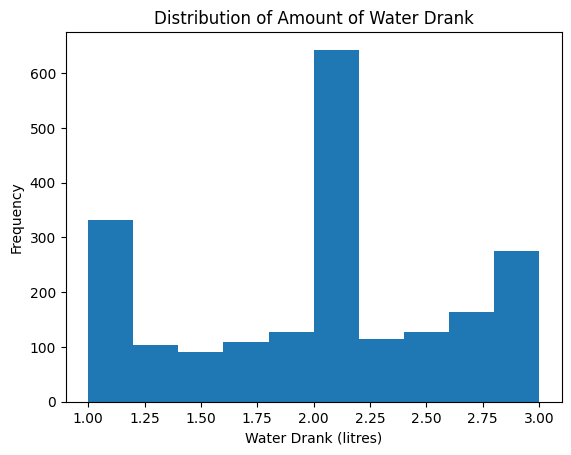

In [14]:
# Histograms for confusing data types that say integer but look continuous decimal?
plt.hist(obesity_data_clean.amt_water)
plt.title('Distribution of Amount of Water Drank')
plt.xlabel('Water Drank (litres)')
plt.ylabel('Frequency')
plt.show()

# confirms that the water amounts are actually not integers

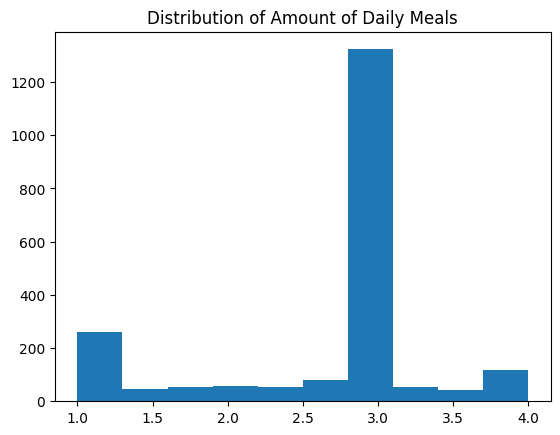

In [15]:
plt.hist(obesity_data_clean.amt_daily_meals)
plt.title('Distribution of Amount of Daily Meals')
plt.show()



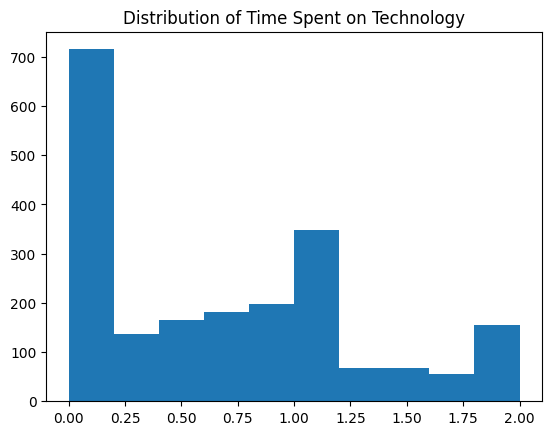

In [16]:
plt.hist(obesity_data_clean.time_technology)
plt.title('Distribution of Time Spent on Technology')
plt.show()

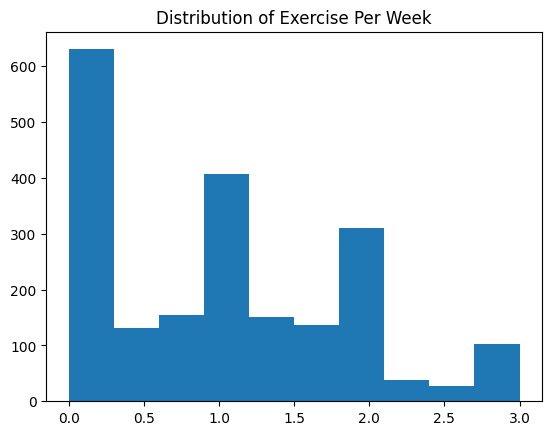

In [17]:
plt.hist(obesity_data_clean.exercise_per_week)
plt.title('Distribution of Exercise Per Week')
plt.show()

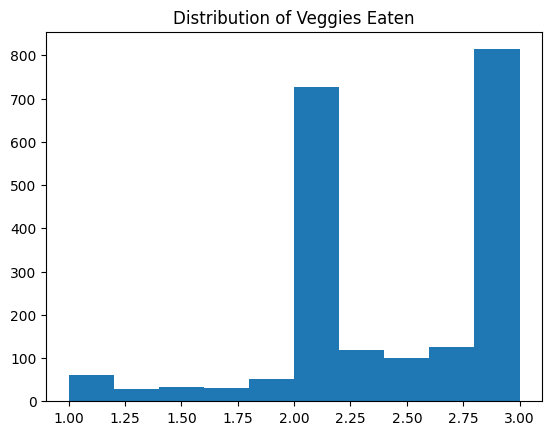

In [18]:
plt.hist(obesity_data_clean.freq_veggie)
plt.title('Distribution of Veggies Eaten')
plt.show()

In [19]:
# creating obesity as a continuous variable (0 - 7)


obesity_data_clean.obesity_group.unique()

obesity_data_clean.loc[:,'obesity_group_cont'] = obesity_data_clean['obesity_group'].map({'insufficient_weight': 0, 
                                                                   'normal_weight': 1,
                                                                   'overweight_level_i': 2,
                                                                   'overweight_level_ii': 3,
                                                                   'obesity_type_i': 4,
                                                                   'obesity_type_ii': 5,
                                                                   'obesity_type_iii': 6})

/var/folders/jl/6cpcgscn66v90thk48s_d56r0000gn/T/ipykernel_97372/3198926028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_data_clean.loc[:,'obesity_group_cont'] = obesity_data_clean['obesity_group'].map({'insufficient_weight': 0,


In [20]:
obesity_data_clean.head()

,gender,age,height,weight,family_history,high_cal_diet,freq_veggie,amt_daily_meals,freq_snacking,smoking,amt_water,cal_monitoring,exercise_per_week,time_technology,freq_alcohol,transport,obesity_group,obesity_group_cont
0,female,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,public_transportation,normal_weight,1
1,female,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,public_transportation,normal_weight,1
2,male,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,public_transportation,normal_weight,1
3,male,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,walking,overweight_level_i,2
4,male,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,public_transportation,overweight_level_ii,3


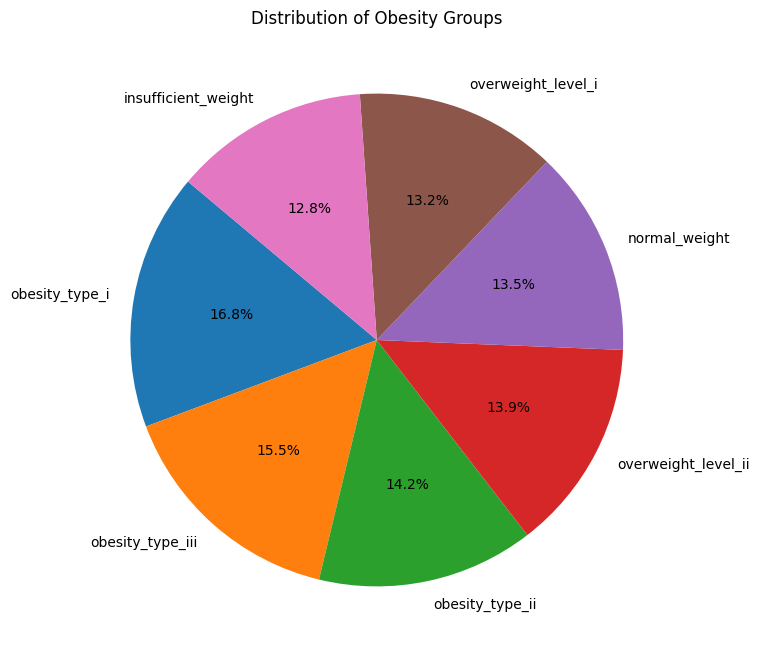

In [21]:
# pie chart for obesity group:

group_counts = obesity_data_clean['obesity_group'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Obesity Groups')
plt.show()

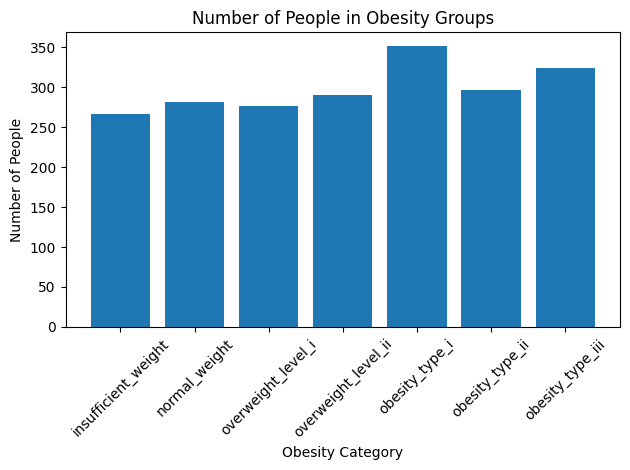

In [23]:
group_counts = group_counts.sort_index()
group_counts = group_counts.reindex(['insufficient_weight', 
                                                     'normal_weight',
                                                     'overweight_level_i', 'overweight_level_ii',
                                                     'obesity_type_i', 
                                                     'obesity_type_ii', 
                                                     'obesity_type_iii'])

plt.bar(group_counts.index, group_counts.values)
plt.xlabel('Obesity Category')
plt.ylabel('Number of People')
plt.title('Number of People in Obesity Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
print("Females: ", len(obesity_data_clean[obesity_data_clean['gender']=='female']))
print("Males: ", len(obesity_data_clean[obesity_data_clean['gender']=='male']))

Females:  1035
Males:  1052


14.0 61.0
Mean Age: 24.353089797316724


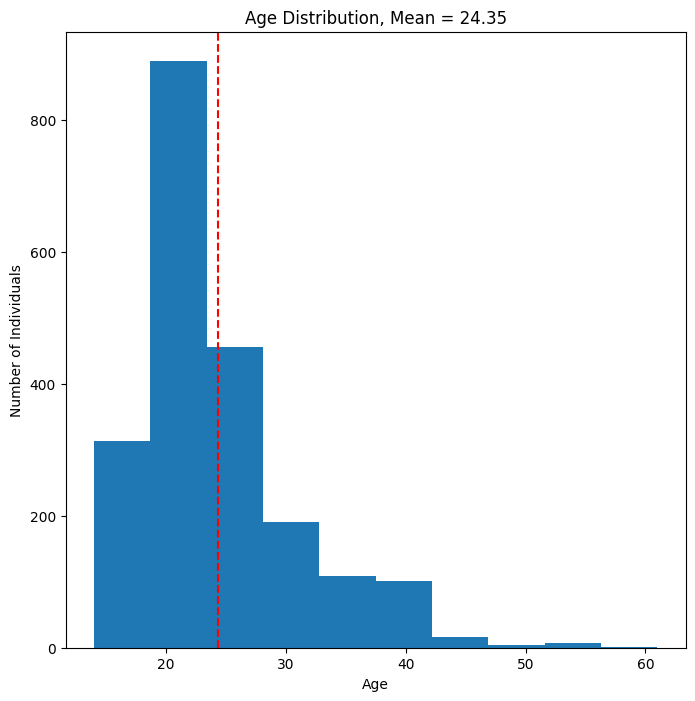

In [25]:
# age bins
print(obesity_data_clean.age.min(), obesity_data_clean.age.max()) # 14 - 61
print(f"Mean Age: {obesity_data_clean.age.mean()}")

plt.figure(figsize=(8,8))
plt.hist(obesity_data_clean.age)
plt.axvline(x=obesity_data_clean.age.mean(), color='red', linestyle='--', linewidth=1.5)  # Customize line appearance

plt.title(f'Age Distribution, Mean = {obesity_data_clean.age.mean().round(2)}')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.show()

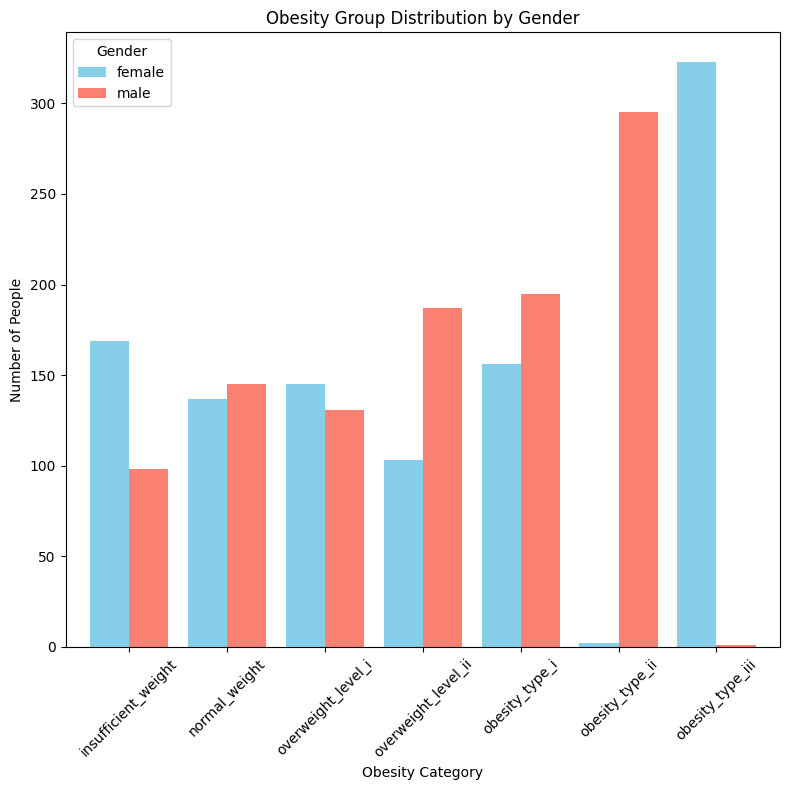

In [26]:

obesity_gender_split = obesity_data_clean.groupby(['obesity_group', 'gender']).size().unstack()

obesity_gender_split = obesity_gender_split.reindex(['insufficient_weight', 
                                                     'normal_weight',
                                                     'overweight_level_i', 'overweight_level_ii',
                                                     'obesity_type_i', 
                                                     'obesity_type_ii', 
                                                     'obesity_type_iii'])

obesity_gender_split.plot(kind='bar', figsize=(8,8), color=['skyblue', 'salmon'], width = 0.8)

plt.xlabel('Obesity Category')
plt.ylabel('Number of People')
plt.title('Obesity Group Distribution by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


- very few men have obesity type iii, but many more men than women have obesity type ii

,gender,obesity_group,mean_weight
0,female,insufficient_weight,46.798449
1,female,normal_weight,56.364234
2,female,obesity_type_i,82.293181
3,female,obesity_type_ii,96.750000
4,female,obesity_type_iii,120.779941
5,female,overweight_level_i,69.579014
6,female,overweight_level_ii,74.537996
7,male,insufficient_weight,55.556979
8,male,normal_weight,67.645517
9,male,obesity_type_i,101.331813


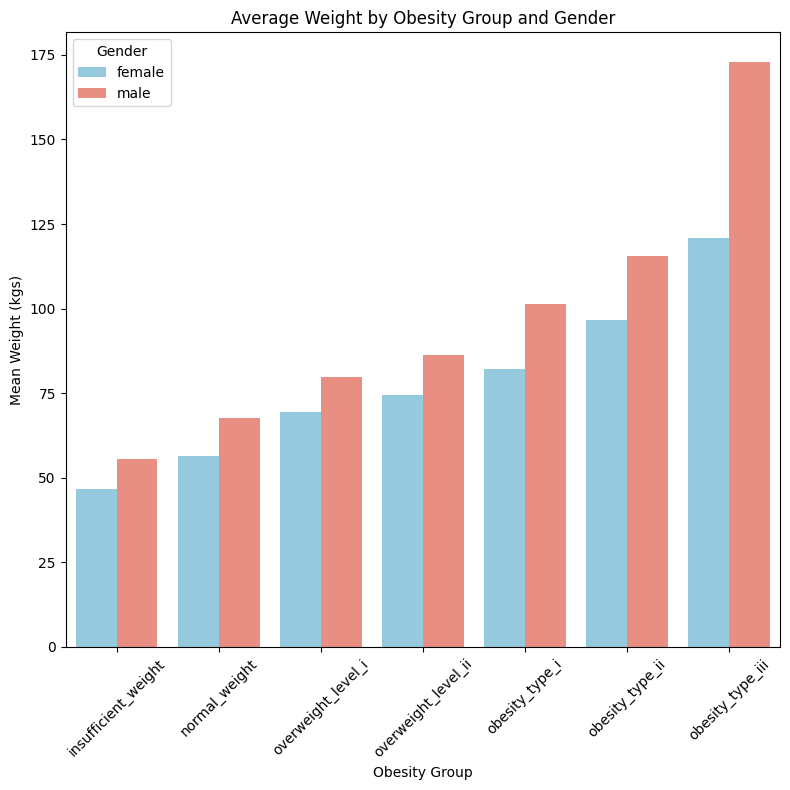

In [27]:
# mean weight in each group, split between males and females

weight_per_group_gender = obesity_data_clean.groupby(['gender', 'obesity_group']).weight.mean().reset_index()

weight_per_group_gender.rename(columns={'weight': 'mean_weight'}, inplace=True)

obesity_label_order = [
    'insufficient_weight', 'normal_weight', 
    'overweight_level_i', 'overweight_level_ii', 
    'obesity_type_i', 'obesity_type_ii', 'obesity_type_iii'
]

display(weight_per_group_gender)

plt.figure(figsize=(8,8))
sns.barplot(x='obesity_group', y='mean_weight', hue='gender', palette=['skyblue','salmon'],data=weight_per_group_gender, width=0.8, order = obesity_label_order)
plt.xlabel('Obesity Group')
plt.ylabel('Mean Weight (kgs)')
plt.title('Average Weight by Obesity Group and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [28]:
obesity_data_clean['transport'].value_counts()

# should do percent of people in each category 

transport
public_transportation    1558
automobile                456
walking                    55
motorbike                  11
bike                        7
Name: count, dtype: int64

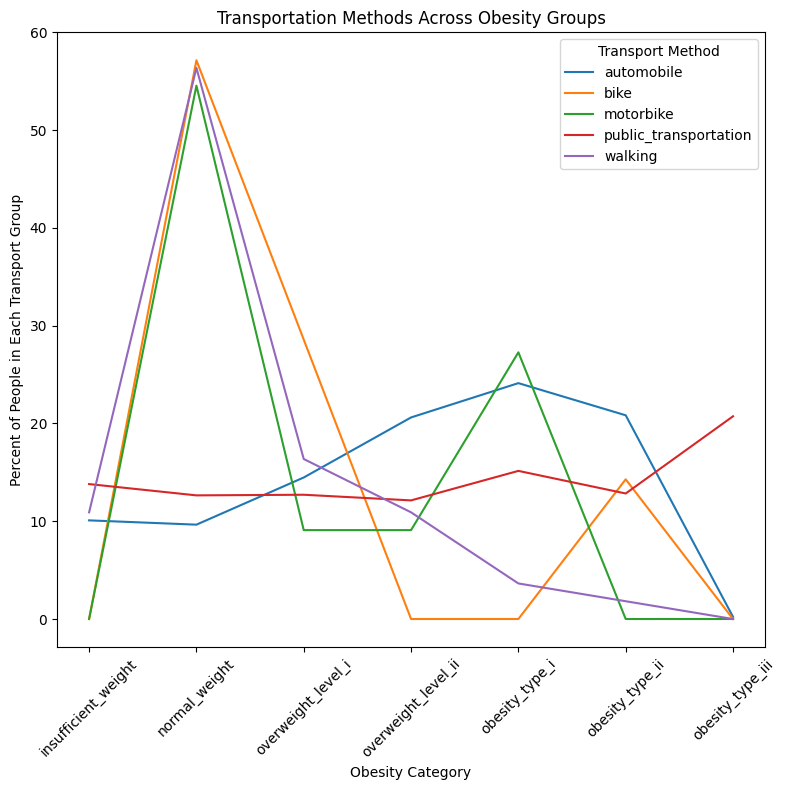

In [29]:
# transport and obesity groups

obesity_transport_split = obesity_data_clean.groupby(['obesity_group', 'transport']).size().unstack()

obesity_transport_split = obesity_transport_split.reindex(['insufficient_weight', 
                                                     'normal_weight',
                                                     'overweight_level_i', 'overweight_level_ii',
                                                     'obesity_type_i', 
                                                     'obesity_type_ii', 
                                                     'obesity_type_iii'])
obesity_transport_percent = obesity_transport_split.div(obesity_transport_split.sum(axis=0), axis=1) * 100
obesity_transport_percent = obesity_transport_percent.fillna(0)
obesity_transport_percent.plot(kind='line', figsize=(8,8))

plt.xlabel('Obesity Category')
plt.ylabel('Percent of People in Each Transport Group')
plt.title('Transportation Methods Across Obesity Groups')
plt.xticks(rotation=45)
plt.legend(title='Transport Method')
plt.tight_layout()
plt.show()

obesity_group
insufficient_weight    0.847689
normal_weight          0.677305
obesity_type_i         0.676743
obesity_type_ii        0.515186
obesity_type_iii       0.604623
overweight_level_i     0.644086
overweight_level_ii    0.697275
Name: time_technology, dtype: float64


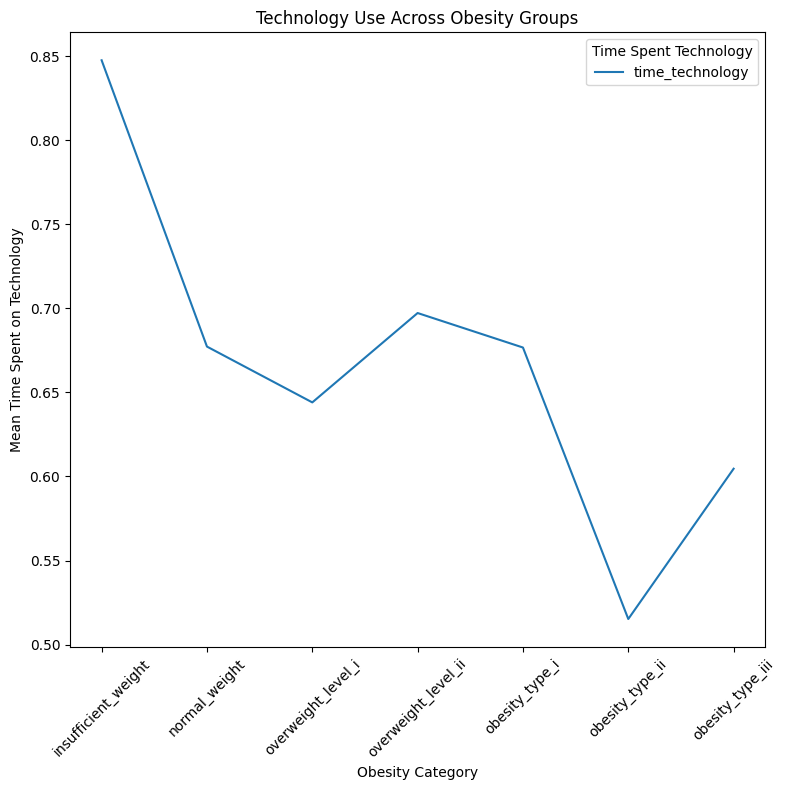

In [30]:
# technology

obesity_technology_mean = obesity_data_clean.groupby('obesity_group')['time_technology'].mean()
print(obesity_technology_mean)

obesity_technology_mean = obesity_technology_mean.reindex(['insufficient_weight', 
                                                     'normal_weight',
                                                     'overweight_level_i', 'overweight_level_ii',
                                                     'obesity_type_i', 
                                                     'obesity_type_ii', 
                                                     'obesity_type_iii'])

obesity_technology_mean.plot(kind='line', figsize=(8,8))

plt.xlabel('Obesity Category')
plt.ylabel('Mean Time Spent on Technology')
plt.title('Technology Use Across Obesity Groups')
plt.xticks(rotation=45)
plt.legend(title='Time Spent Technology')
plt.tight_layout()
plt.show()

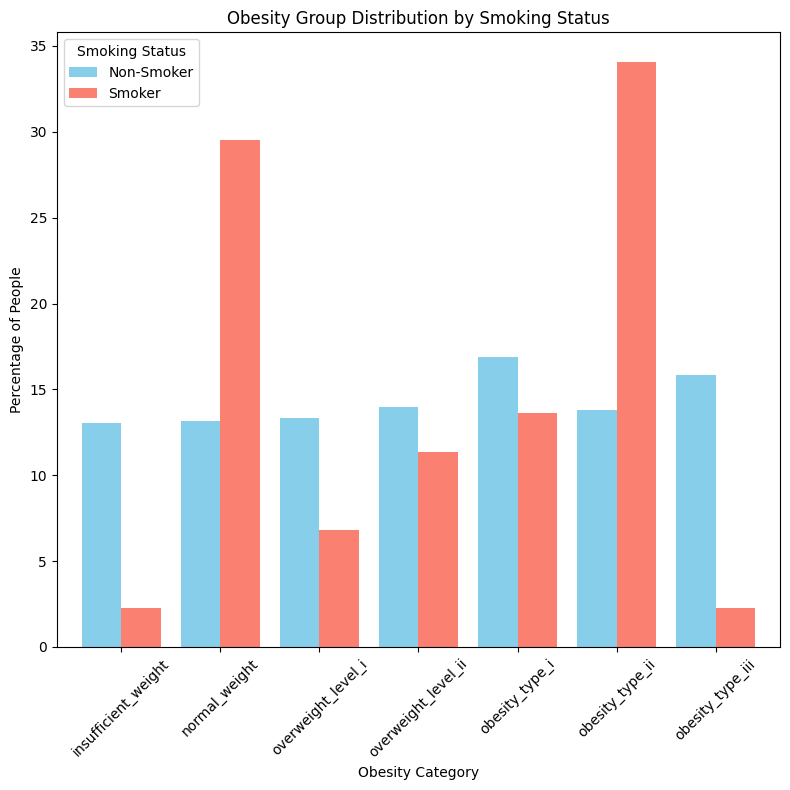

In [31]:
# smoking

obesity_smoking_split = obesity_data_clean.groupby(['obesity_group', 'smoking']).size().unstack()

obesity_smoking_split = obesity_smoking_split.reindex(['insufficient_weight', 
                                                     'normal_weight',
                                                     'overweight_level_i', 'overweight_level_ii',
                                                     'obesity_type_i', 
                                                     'obesity_type_ii', 
                                                     'obesity_type_iii'])

obesity_smoking_percent = obesity_smoking_split.div(obesity_smoking_split.sum(axis=0), axis=1) * 100
obesity_smoking_percent.plot(kind='bar', figsize=(8,8), color=['skyblue', 'salmon'], width = 0.8)

plt.xlabel('Obesity Category')
plt.ylabel('Percentage of People')
plt.title('Obesity Group Distribution by Smoking Status')
plt.xticks(rotation=45)
plt.legend(title='Smoking Status', labels=['Non-Smoker', 'Smoker'])
plt.tight_layout()
plt.show()

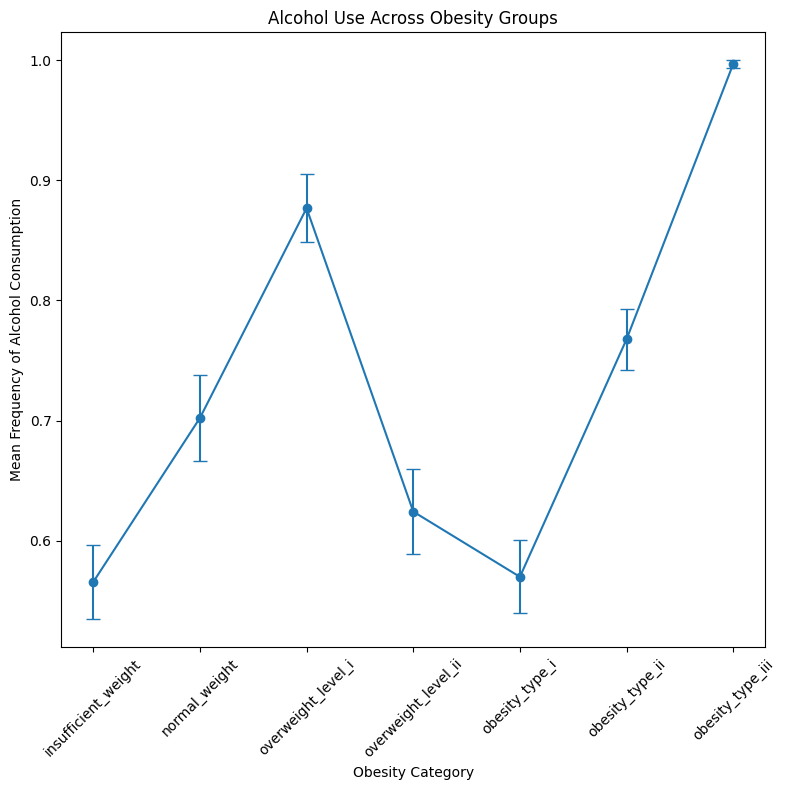

In [32]:
# alcohol
obesity_alcohol_mean = obesity_data_clean.groupby(['obesity_group'])['freq_alcohol'].mean()
obesity_alcohol_SEM = obesity_data_clean.groupby(['obesity_group'])['freq_alcohol'].sem()

order = ['insufficient_weight', 
         'normal_weight',
         'overweight_level_i', 
         'overweight_level_ii',
         'obesity_type_i', 
         'obesity_type_ii', 
         'obesity_type_iii']

obesity_alcohol_mean = obesity_alcohol_mean.reindex(order)
obesity_alcohol_SEM = obesity_alcohol_SEM.reindex(order)

plt.figure(figsize=(8,8))
plt.errorbar(x=obesity_alcohol_mean.index, y=obesity_alcohol_mean, yerr=obesity_alcohol_SEM, fmt='-o', capsize=5)
plt.xlabel('Obesity Category')
plt.ylabel('Mean Frequency of Alcohol Consumption')
plt.title('Alcohol Use Across Obesity Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


obesity_group        gender
insufficient_weight  female    0.621302
                     male      0.469388
normal_weight        female    0.613139
                     male      0.786207
obesity_type_i       female    0.506410
                     male      0.620513
obesity_type_ii      female    0.500000
                     male      0.769492
obesity_type_iii     female    0.996904
                     male      1.000000
overweight_level_i   female    0.882759
                     male      0.870229
overweight_level_ii  female    0.407767
                     male      0.743316
Name: freq_alcohol, dtype: float64


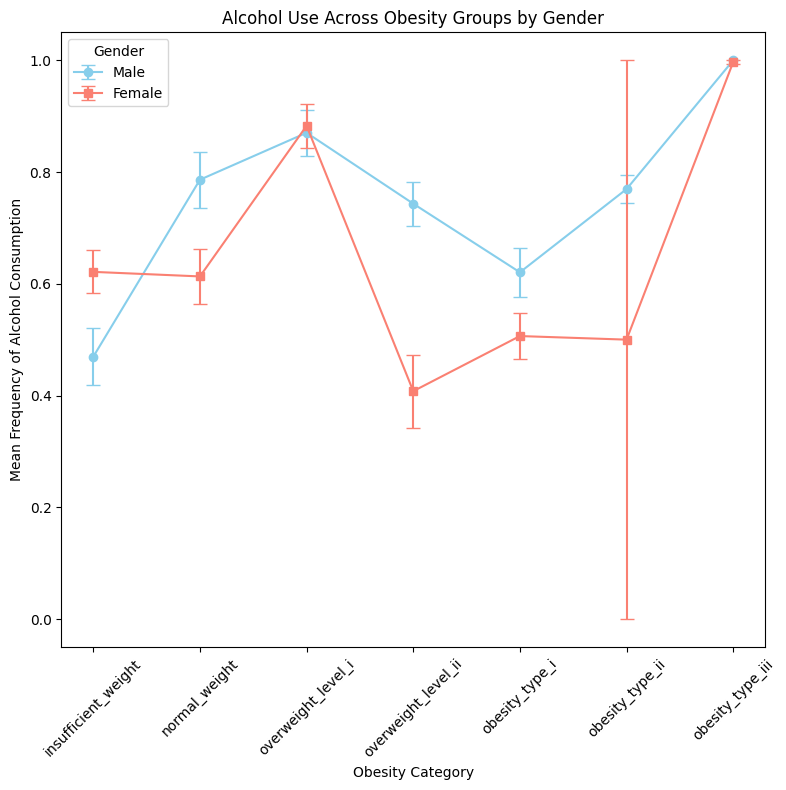

In [33]:

# alcohol and gender

obesity_alcohol_mean = obesity_data_clean.groupby(['obesity_group','gender'])['freq_alcohol'].mean()
obesity_alcohol_SEM = obesity_data_clean.groupby(['obesity_group', 'gender'])['freq_alcohol'].sem()
print(obesity_alcohol_mean)

order = ['insufficient_weight', 
         'normal_weight',
         'overweight_level_i', 
         'overweight_level_ii',
         'obesity_type_i', 
         'obesity_type_ii', 
         'obesity_type_iii']


# unstacking to separate male and female
obesity_alcohol_mean = obesity_alcohol_mean.unstack()
obesity_alcohol_SEM = obesity_alcohol_SEM.unstack()

obesity_alcohol_mean = obesity_alcohol_mean.reindex(order)
obesity_alcohol_SEM = obesity_alcohol_SEM.reindex(order)

# plot
plt.figure(figsize=(8,8))
#males
plt.errorbar(x=obesity_alcohol_mean.index, y=obesity_alcohol_mean['male'], yerr=obesity_alcohol_SEM['male'], fmt='-o', capsize=5, label='Male',color = 'skyblue')
#females
plt.errorbar(x=obesity_alcohol_mean.index, y=obesity_alcohol_mean['female'], yerr=obesity_alcohol_SEM['female'], fmt='-s', capsize=5, label='Female', color = 'salmon')
#plot details
plt.xlabel('Obesity Category')
plt.ylabel('Mean Frequency of Alcohol Consumption')
plt.title('Alcohol Use Across Obesity Groups by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [34]:
# continuous variables heatmap 

continuous_variables_filter = ['amt_daily_meals','amt_water','freq_veggie','time_technology','exercise_per_week','age','height','obesity_group_cont','smoking','freq_alcohol','high_cal_diet','family_history','freq_snacking','cal_monitoring','weight']


continuous_variables = obesity_data_clean[continuous_variables_filter]
continuous_variables.head()

,amt_daily_meals,amt_water,freq_veggie,time_technology,exercise_per_week,age,height,obesity_group_cont,smoking,freq_alcohol,high_cal_diet,family_history,freq_snacking,cal_monitoring,weight
0,3.0,2.0,2.0,1.0,0.0,21.0,1.62,1,0,0,0,1,1,0,64.0
1,3.0,3.0,3.0,0.0,3.0,21.0,1.52,1,1,1,0,1,1,1,56.0
2,3.0,2.0,2.0,1.0,2.0,23.0,1.80,1,0,2,0,1,1,0,77.0
3,3.0,2.0,3.0,0.0,2.0,27.0,1.80,2,0,2,0,0,1,0,87.0
4,1.0,2.0,2.0,0.0,0.0,22.0,1.78,3,0,1,0,0,1,0,89.8


In [35]:
corr_mat = continuous_variables.corr()
display(corr_mat)


,amt_daily_meals,amt_water,freq_veggie,time_technology,exercise_per_week,age,height,obesity_group_cont,smoking,freq_alcohol,high_cal_diet,family_history,freq_snacking,cal_monitoring,weight
amt_daily_meals,1.000000,0.075335,0.034885,0.015693,0.127816,-0.055823,0.227806,0.011034,0.005009,0.082985,-0.006398,0.028411,0.072316,-0.020461,0.092149
amt_water,0.075335,1.000000,0.081332,0.020704,0.165310,-0.044058,0.220487,0.134170,-0.031642,0.085460,0.002993,0.168627,-0.114801,0.009325,0.203823
freq_veggie,0.034885,0.081332,1.000000,-0.104128,0.022003,0.013572,-0.040363,0.228591,0.013716,0.063132,-0.025419,0.033199,0.038565,0.071179,0.216574
time_technology,0.015693,0.020704,-0.104128,1.000000,0.058716,-0.302927,0.041808,-0.115323,0.016491,-0.041830,0.071505,0.002314,0.036708,-0.012875,-0.079351
exercise_per_week,0.127816,0.165310,0.022003,0.058716,1.000000,-0.148202,0.293584,-0.206001,0.010811,-0.086825,-0.111184,-0.062937,0.034803,0.073768,-0.056490
age,-0.055823,-0.044058,0.013572,-0.302927,-0.148202,1.000000,-0.031748,0.279231,0.091261,0.045565,0.063895,0.200379,-0.092097,-0.117959,0.198160
height,0.227806,0.220487,-0.040363,0.041808,0.293584,-0.031748,1.000000,0.124863,0.054326,0.135756,0.180694,0.232258,-0.058001,-0.137078,0.457468
obesity_group_cont,0.011034,0.134170,0.228591,-0.115323,-0.206001,0.279231,0.124863,1.000000,0.001984,0.155300,0.249927,0.503374,-0.342205,-0.197819,0.912453
smoking,0.005009,-0.031642,0.013716,0.016491,0.010811,0.091261,0.054326,0.001984,1.000000,0.083181,-0.050713,0.014885,0.054960,0.047384,0.024369
freq_alcohol,0.082985,0.085460,0.063132,-0.041830,-0.086825,0.045565,0.135756,0.155300,0.083181,1.000000,0.087661,-0.028403,-0.039502,0.004175,0.211351


<Axes: >

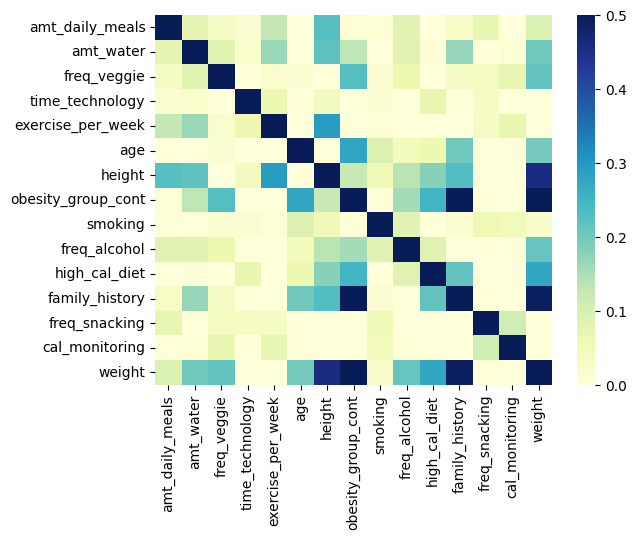

In [36]:
sns.heatmap(corr_mat, cmap="YlGnBu", vmin=0, vmax=0.5)
# darker the colour the stronger the correlation


- family history is definitely the strongest factor associated with obesity (apart from weight)
- also age and high calorie diet and the frequency of vegetable consumption

In [38]:
# correlation between weight and height

correlation, p_value = spearmanr(obesity_data_clean.height, obesity_data_clean.weight)
print(f"Spearman's Rho: {correlation}, p = {p_value}") 

# weight and height are strongly correlated

Spearman's Rho: 0.45612851844614494, p = 9.397955212904852e-108
